# Diwali Sales Data Calculation

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea

In [3]:
# first read the data set
df = pd.read_csv("./Diwali Sales Data.csv" , encoding="latin1")

# print the head of data
print(df.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

## Basic information about data

In [4]:
# now find the spae of the data
print("Shape of data \n", df.shape, "\n")

# now find the columns of data
print("\n columns of data \n", df.columns , "\n")

# basic info about data
print("\n Basic info of data", df.info(), "\n" )

Shape of data 
 (11251, 15) 


 columns of data 
 Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  

## Now Cleaning the data

In [5]:
# first delete the cols which have no any value
df.drop(["Status","unnamed1"],axis=1, inplace=True) # this remove the status , and unnamed1 columns from data

In [11]:
# now check how much null or nan values exist in our data
totalNull = df.isnull().sum();
print("Total Null Values \n", totalNull)

Total Null Values 
 User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


In [7]:
# so we have almost 12 rows which do not have the value in amount

# drop the rows which do not have value
df.dropna(axis=0 ,inplace=True)

In [8]:
# now check is there any duplicate value in or data
totalDuplicates = df["User_ID"].duplicated().sum()
print("Total Duplicate values \n", totalDuplicates) 

Total Duplicate values 
 7487


In [9]:
# now change the dataType of Amount from float to int
df["Amount"] = df["Amount"].astype("int")

In [10]:
# basic descriptive values of data
print(df.describe())

            User_ID           Age  Marital_Status        Orders        Amount
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


## Data Analysis

Axes(0.125,0.11;0.775x0.77)


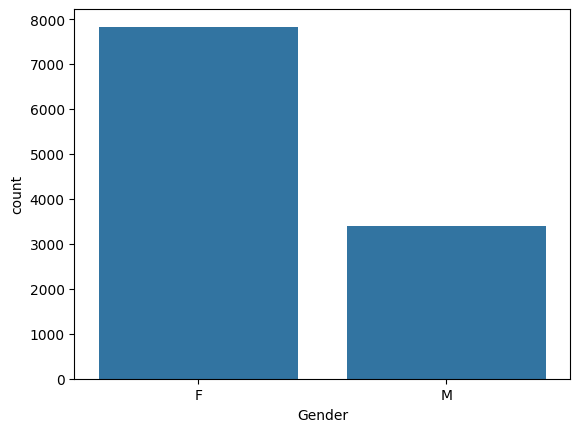

In [12]:
x = sea.countplot(x="Gender" , data=df)
print(x)

<Axes: xlabel='Gender', ylabel='Amount'>

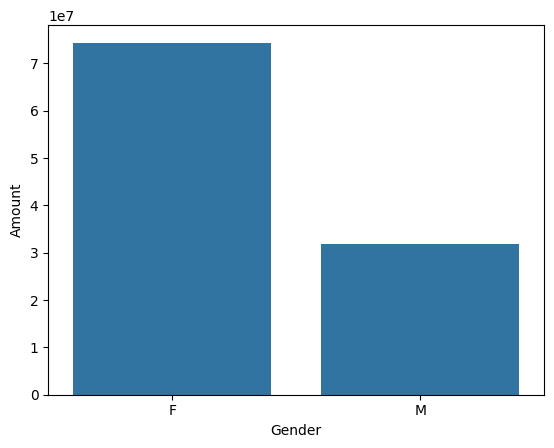

In [14]:
sales_gender = df.groupby(["Gender"],as_index=False)["Amount"].sum()
sea.barplot(x="Gender",y="Amount",data=sales_gender)

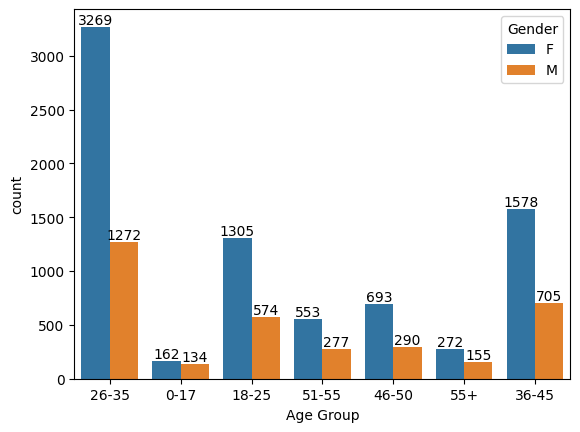

In [51]:
# find the group-age
ax = sea.countplot(x="Age Group" , data=df , hue="Gender")
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Amount'>

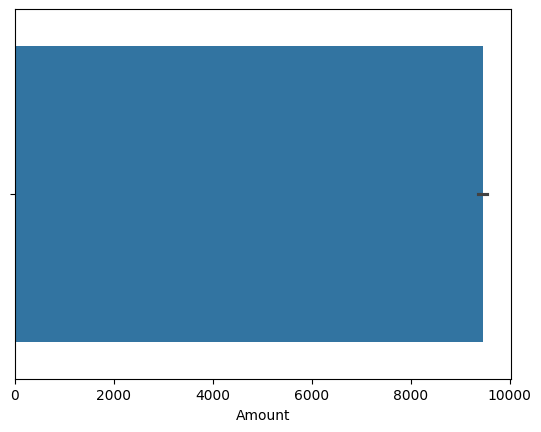

In [15]:
# total amount 
sea.barplot(x="Amount",data=df)

<Axes: xlabel='Age Group', ylabel='Amount'>

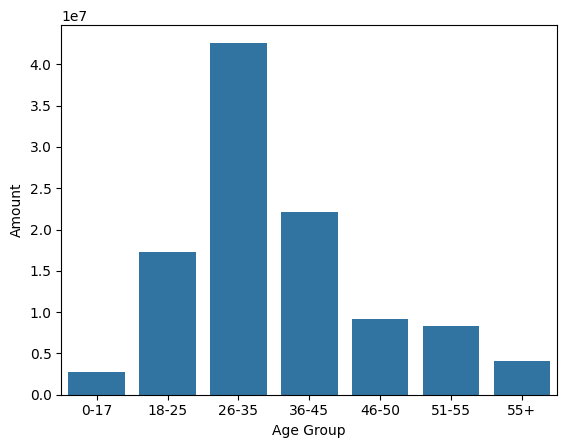

In [21]:
# Total Amount by Age Group
age_amount = df.groupby(["Age Group"],as_index=False)["Amount"].sum()
sea.barplot(x="Age Group",y="Amount", data=age_amount)

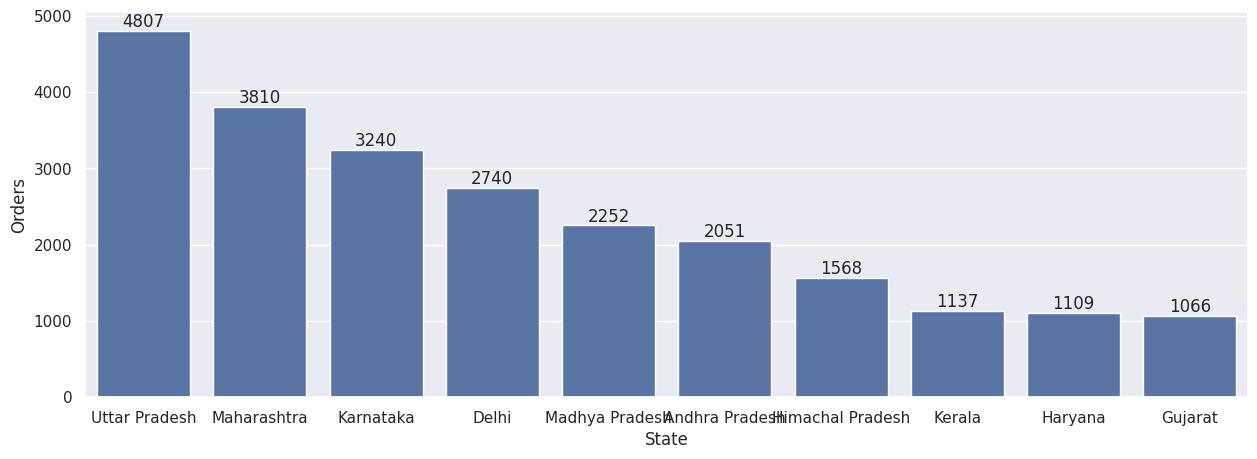

In [27]:
# top 10 state which have most orders
data = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sea.set(rc={'figure.figsize':(15,5)})
ax =sea.barplot(x="State",y="Orders",data=data)
for bar in ax.containers:
    ax.bar_label(bar)

